In [1]:

import pandas as pd
import numpy as np
import math

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# !conda install --yes -c conda-forge missingno
# !conda install --yes -c anaconda requests

In [3]:
# !conda update --yes --all

In [4]:
# import io, os, sys, types, time, datetime, math, random, requests, subprocess, StringIO, tempfile

In [5]:
df = pd.read_csv('nyc_birds_full.csv')

# Initial Data Review:

Already Completed:
- IMPUTATION: all COMMENTs with 'NONE'
- IMPUTATION: Number Observers and Observation Count with 1 

In [6]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LOCALITY,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,HAS MEDIA,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,Arlington Alex Co.,P,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,1.0,0,NONE,NONE,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,Little River Arlington Alex Co.,P,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,1.0,0,NONE,NONE,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1


In [7]:
#Review all the remaining datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699064 entries, 0 to 1699063
Data columns (total 18 columns):
GLOBAL UNIQUE IDENTIFIER    object
CATEGORY                    object
COMMON NAME                 object
OBSERVATION_COUNT           int64
LOCALITY                    object
LOCALITY TYPE               object
LATITUDE                    float64
LONGITUDE                   float64
OBSERVATION_DATE            object
MONTH                       int64
YEAR                        int64
OBSERVER ID                 object
DURATION MINUTES            float64
NUMBER OBSERVERS            float64
HAS MEDIA                   int64
TRIP COMMENTS               object
SPECIES COMMENTS            object
APPROVED                    int64
dtypes: float64(4), int64(5), object(9)
memory usage: 233.3+ MB


In [8]:
# Describing all the Numerical Features
df.describe()

,OBSERVATION_COUNT,LATITUDE,LONGITUDE,MONTH,YEAR,DURATION MINUTES,NUMBER OBSERVERS,HAS MEDIA,APPROVED
count,1.699064e+06,1.699064e+06,1.699064e+06,1.699064e+06,1.699064e+06,1.581611e+06,1.699064e+06,1.699064e+06,1699064.0
mean,8.351684e+00,4.077678e+01,-7.396872e+01,6.093081e+00,2.015254e+03,1.297241e+02,2.982697e+00,1.667447e-02,1.0
std,4.253850e+01,3.126201e-02,1.849401e-02,3.079713e+00,4.753737e+00,1.118350e+02,6.359018e+00,1.280486e-01,0.0
min,1.000000e+00,4.068435e+01,-7.404715e+01,1.000000e+00,1.880000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.0
25%,1.000000e+00,4.077155e+01,-7.397248e+01,4.000000e+00,2.014000e+03,4.500000e+01,1.000000e+00,0.000000e+00,1.0
50%,2.000000e+00,4.077155e+01,-7.397241e+01,5.000000e+00,2.016000e+03,1.050000e+02,1.000000e+00,0.000000e+00,1.0
75%,5.000000e+00,4.077954e+01,-7.396541e+01,9.000000e+00,2.018000e+03,1.800000e+02,2.000000e+00,0.000000e+00,1.0
max,1.255000e+04,4.087877e+01,-7.390822e+01,1.200000e+01,2.020000e+03,7.014000e+03,1.432000e+03,1.000000e+00,1.0


In [9]:
# Describing all the Categorical Features
# Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])) for object

df.describe(include=['O'])

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,LOCALITY,LOCALITY TYPE,OBSERVATION_DATE,OBSERVER ID,TRIP COMMENTS,SPECIES COMMENTS
count,1699064,1699064,1699064,1699064,1699064,1699064,1699064,1699064,1699064
unique,1699064,7,442,6152,4,7123,7102,27829,119286
top,URN:CornellLabOfOrnithology:EBIRD:OBS430622549,species,House Sparrow,Central Park,H,2019-05-04,obsr338513,NONE,NONE
freq,1,1587872,76134,600195,1503578,7945,72980,1015914,1464129


In [10]:
# Check missing values remaining

df.isna().sum()

GLOBAL UNIQUE IDENTIFIER         0
CATEGORY                         0
COMMON NAME                      0
OBSERVATION_COUNT                0
LOCALITY                         0
LOCALITY TYPE                    0
LATITUDE                         0
LONGITUDE                        0
OBSERVATION_DATE                 0
MONTH                            0
YEAR                             0
OBSERVER ID                      0
DURATION MINUTES            117453
NUMBER OBSERVERS                 0
HAS MEDIA                        0
TRIP COMMENTS                    0
SPECIES COMMENTS                 0
APPROVED                         0
dtype: int64

In [11]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LOCALITY,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,HAS MEDIA,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,Arlington Alex Co.,P,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,1.0,0,NONE,NONE,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,Little River Arlington Alex Co.,P,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,1.0,0,NONE,NONE,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1


# VISUALIZATIONS: FIRST ROUND

In [12]:
#Group someo of the numeric columns
df_numeric = df[['OBSERVATION_COUNT', 'MONTH', 'YEAR', 'NUMBER OBSERVERS']]

In [41]:
#group some of the categorical columns
df_cat = df[['CATEGORY', 'LOCALITY TYPE']]


- math.ceil() : Python number method ceil() returns ceiling value of x - the smallest integer not less than x.

- subplots_adjust : allows you to tune subplot parameters

In [14]:
# Let’s plot the distribution of each feature

def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    #set up the seaborn style. 
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    
    #math.ceil() : Python number method ceil() returns ceiling value of x - the smallest integer not less than x.
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    #math.ceil() : Python number method ceil() returns ceiling value of x - the smallest integer not less than x.
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    #Determine vizualization type based on the data types!
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
# plot_distribution(df_subset, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

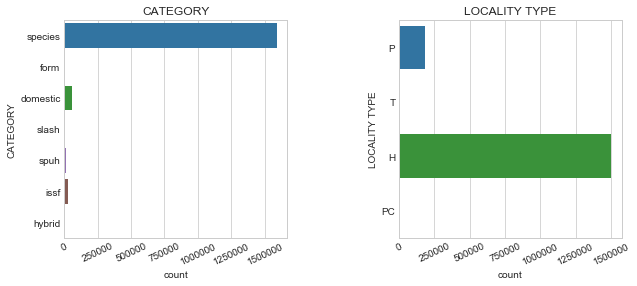

In [40]:
#Revie
plot_distribution(df_cat, cols=2, width=10, height=4, hspace=0.45, wspace=0.5)

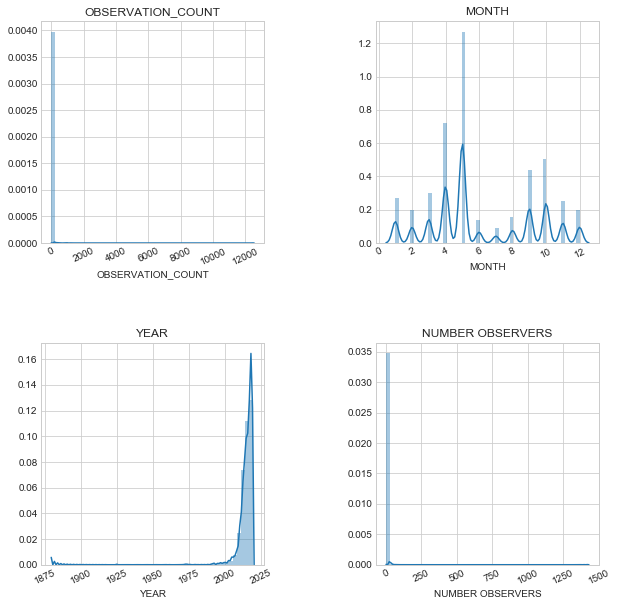

In [26]:
plot_distribution(df_numeric, cols=2, width=10, height=10, hspace=0.45, wspace=0.5)

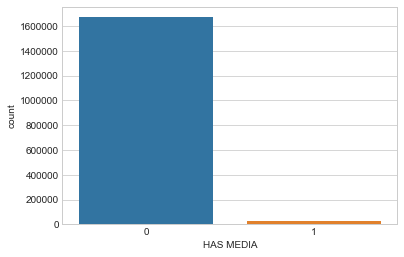

In [35]:
sns.countplot(df['HAS MEDIA'])

**OBSERVATIONS ABOVE**:

- CATEGORY : most are 'species' followed by 'domestic'
- LOCALITY TYPE : Surprisingly, most are in a 'Hotspot'. Perhaps refers to central park?
- OBSERVATION COUNT : most sightings are of a single bird. Should investigate **outliers**.
- MONTH: Most sightings are April-June, followed by Sept-Oct (during migration)
- YEAR: Huge peak in overall sightings around the year 2000 (smart phones?)
- NUMBER OBSERVERS : Mostly small groups. Should investigate **outliers**.
- HAS MEDIA: Huge imbalance in those who do. Should look into how/why someone gets media.


Not reviewed:

- COMMON NAME: Too large, needs special engineering
- OBSERVATION DATE : Too large, overall obervation counts increases over time.
- OBSERVER ID: Too large, but should investigate individual high contributers.
- DURATION MINUTES : Issue with NAN values still needs to be cleared.


# Further Data Cleaning: Dealing with Missing Data

**Cleaning**: To clean our data, we'll need to work with:

- Missing values: Either omit elements from a dataset that contain missing values or impute them (fill them in).
- Special values: Numeric variables are endowed with several formalized special values including ±Inf, NA and NaN. Calculations involving special values often result in special values, and need to be handled/cleaned.
- Outliers: They should be detected, but not necessarily removed. Their inclusion in the analysis is a statistical decision.
- Obvious inconsistencies: A person's age cannot be negative, a man cannot be pregnant and an under-aged person cannot possess a drivers license. Find the inconsistencies and plan for them.
- Engineering: There are multiple techniques for feature engineering:

**Decompose**: 
- Converting 2014-09-20T20:45:40Z into categorical attributes like hour_of_the_day, part_of_day, etc.
- Discretization: We can choose to either discretize some of the continuous variables we have, as some algorithms will perform faster. We are going to do both, and compare the results of the ML algorithms on both discretized and non discretised datasets. We'll call these datasets:
    - dataset_bin => where Continuous variables are Discretised
    - dataset_con => where Continuous variables are Continuous
- Reframe Numerical Quantities: Changing from grams to kg, and losing detail might be both wanted and efficient for calculation
- Feature Crossing: Creating new features as a combination of existing features. Could be multiplying numerical features, or combining categorical variables. This is a great way to add domain expertise knowledge to the dataset.

**Imputation**: We can impute missing values in a number of different ways:

- Hot-Deck: The technique then finds the first missing value and uses the cell value immediately prior to the data that are missing to impute the missing value.
- Cold-Deck: Selects donors from another dataset to complete missing data.
- Mean-substitution: Another imputation technique involves replacing any missing value with the mean of that variable for all other cases, which has the benefit of not changing the sample mean for that variable.
- Regression: A regression model is estimated to predict observed values of a variable based on other variables, and that model is then used to impute values in cases where that variable is missing.

# FEATURE ENGINEERING + ANALYSIS

In [24]:
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables

# FEATURE: SPECIES

# FEATURE: COMMENTS

Overview and exploration of the comments in preparation for NLP. All NAN values will be inputed with the string 'unknown'.

In [16]:
#There are a lot of missing comments
print(df['SPECIES COMMENTS'].isna().sum())
print(df['TRIP COMMENTS'].isna().sum())

0
0


In [17]:
after_2005 = df[df['YEAR'] > 2005]
after_2005['TRIP COMMENTS'].isna().sum()

0

In [18]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LOCALITY,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,HAS MEDIA,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,Arlington Alex Co.,P,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,1.0,0,NONE,NONE,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,Little River Arlington Alex Co.,P,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,1.0,0,NONE,NONE,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1


In [19]:
def print_trip_comments(index):
    """Returns a single row sample from the comment column with corresponding unique identifier"""
    example = df[df.index == index][['GLOBAL UNIQUE IDENTIFIER', 'TRIP COMMENTS']].values[0]
    if len(example) > 0:
        print(example[0])
        print('TRIP COMMENTS:', example[1])

In [20]:
print_trip_comments(48465)

URN:CornellLabOfOrnithology:EBIRD:OBS35685993
TRIP COMMENTS: Report not submitted to eBirds NYC.----Date: Tue, 26 Jul 2005 (3:35p-8:00p)--Location: Central Park - reservoir, The Pond & Heckscher Ballfields ----** 27 species


In [21]:
print_trip_comments(655467)

URN:CornellLabOfOrnithology:EBIRD:OBS324901157
TRIP COMMENTS: Maintenance, Tupelo meadow, Humming Tombstone, Mugger's Woods, Upper Lobe, Naturalists' Walk


In [22]:
def print_species_comments(index):
    """Returns a single row sample from the comment column with corresponding unique identifier"""
    example = df[df.index == index][['GLOBAL UNIQUE IDENTIFIER', 'SPECIES COMMENTS']].values[0]
    if len(example) > 0:
        print(example[0])
        print('SPECIES COMMENTS:', example[1])

In [23]:
print_species_comments(555552)

URN:CornellLabOfOrnithology:EBIRD:OBS286403491
SPECIES COMMENTS: NONE
